In [2]:
 %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('./Resources/WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 2. **Data Processing**

In [4]:
# Drop unneccessary columns
new_data = data.drop(columns=['Effective To Date', 'Customer'])
new_data

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,23405.987980,No,Basic,Bachelor,Employed,M,71941,Urban,Married,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,California,3096.511217,Yes,Extended,College,Employed,F,21604,Suburban,Divorced,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,California,8163.890428,No,Extended,Bachelor,Unemployed,M,0,Suburban,Single,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,California,7524.442436,No,Extended,College,Employed,M,21941,Suburban,Married,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
# Add a column of 'Quartile LTV'. This column will determine the quartile where each 
# customer falls in thems of Customer Life Time Value.

# First, find the quartile threshold values

ltv = new_data["Customer Lifetime Value"]  

print("Q3 quantile of arr : ", np.quantile(ltv, .25)) 
print("Q2 quantile of arr : ", np.quantile(ltv, .50))  
print("Q1 quantile of arr : ", np.quantile(ltv, .75)) 

Q3 quantile of arr :  3994.25179425
Q2 quantile of arr :  5780.182197
Q1 quantile of arr :  8962.16704125


In [6]:
# Create new column with conditions based on quartlie thresholds
new_data.loc[(new_data['Customer Lifetime Value'] >0) & (new_data['Customer Lifetime Value']<= 3994.26), 'Quartile LTV'] = 4 
new_data.loc[(new_data['Customer Lifetime Value'] > 3994.26)& (new_data['Customer Lifetime Value'] <= 5780.182197), 'Quartile LTV'] = 3
new_data.loc[(new_data['Customer Lifetime Value'] > 5780.19) & (new_data['Customer Lifetime Value']<= 8962.16), 'Quartile LTV'] = 2
new_data.loc[(new_data['Customer Lifetime Value'] > 8962.17), 'Quartile LTV'] = 1
new_data.head(50)

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Quartile LTV
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,4.0
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2.0
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1.0
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2.0
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,4.0
5,Oregon,8256.297800,Yes,Basic,Bachelor,Employed,F,62902,Rural,Married,...,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize,2.0
6,Oregon,5380.898636,Yes,Basic,College,Employed,F,55350,Suburban,Married,...,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize,3.0
7,Arizona,7216.100311,No,Premium,Master,Unemployed,M,0,Urban,Single,...,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize,2.0
8,Oregon,24127.504020,Yes,Basic,Bachelor,Medical Leave,M,14072,Suburban,Divorced,...,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize,1.0
9,Oregon,7388.178085,No,Extended,College,Employed,F,28812,Urban,Married,...,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize,2.0


In [7]:
#Drop 'Customer Lifetime Value' variable
new_data_quartileLTV = new_data.drop(columns=['Customer Lifetime Value'])
new_data_quartileLTV.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Quartile LTV
0,Washington,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,...,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,4.0
1,Arizona,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,...,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2.0
2,Nevada,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,...,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,1.0
3,California,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,...,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2.0
4,Washington,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,...,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,4.0


In [8]:
# Dummy coding for categorical variables (get_dummies)
# Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers.
# We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these 
# standard preprocessing techniques. Pandas also provides a get_dummies method that is useful to generate binary 
# encoded data from a Data Frame.

data_binary_encoded = pd.get_dummies(new_data, columns=['State','Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
data_binary_encoded.head()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Quartile LTV,State_Arizona,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,56274,69,32,5,0,1,384.811147,4.0,0,...,0,0,0,0,0,0,1,0,1,0
1,6979.535903,0,94,13,42,0,8,1131.464935,2.0,1,...,0,1,0,0,0,0,0,0,1,0
2,12887.431650,48767,108,18,38,0,2,566.472247,1.0,0,...,0,0,0,0,0,0,1,0,1,0
3,7645.861827,0,106,18,65,0,7,529.881344,2.0,0,...,0,0,0,0,1,0,0,0,1,0
4,2813.692575,43836,73,12,44,0,1,138.130879,4.0,0,...,0,1,0,0,0,0,0,0,1,0


In [9]:
# number of columns after dummy
for col in data_binary_encoded.columns: 
    print(col)
len(list(data_binary_encoded.columns.values))

Customer Lifetime Value
Income
Monthly Premium Auto
Months Since Last Claim
Months Since Policy Inception
Number of Open Complaints
Number of Policies
Total Claim Amount
Quartile LTV
State_Arizona
State_California
State_Nevada
State_Oregon
State_Washington
Response_No
Response_Yes
Coverage_Basic
Coverage_Extended
Coverage_Premium
Education_Bachelor
Education_College
Education_Doctor
Education_High School or Below
Education_Master
EmploymentStatus_Disabled
EmploymentStatus_Employed
EmploymentStatus_Medical Leave
EmploymentStatus_Retired
EmploymentStatus_Unemployed
Gender_F
Gender_M
Location Code_Rural
Location Code_Suburban
Location Code_Urban
Marital Status_Divorced
Marital Status_Married
Marital Status_Single
Policy Type_Corporate Auto
Policy Type_Personal Auto
Policy Type_Special Auto
Policy_Corporate L1
Policy_Corporate L2
Policy_Corporate L3
Policy_Personal L1
Policy_Personal L2
Policy_Personal L3
Policy_Special L1
Policy_Special L2
Policy_Special L3
Renew Offer Type_Offer1
Renew O

66


# 3. **Linear Regression Model**

In [11]:
# Assign X (data) and y (target)
X = data_binary_encoded.drop("Quartile LTV", axis=1)
y = data_binary_encoded["Quartile LTV"].values.reshape(-1, 1)
print(X.shape, y.shape)

(9134, 65) (9134, 1)


In [12]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)


In [13]:
# Create the model
from sklearn.linear_model import LinearRegression
linear_regression_model_1 = LinearRegression()

In [14]:
# Fit the model to the training data and calculate the scores for the training and testing data

linear_regression_model_1.fit(X_train, y_train)
training_score = linear_regression_model_1 .score(X_train, y_train)
testing_score = linear_regression_model_1 .score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6233089529187752
Testing Score: 0.6071119671705703


Text(0.5, 1.0, 'Residual Plot')

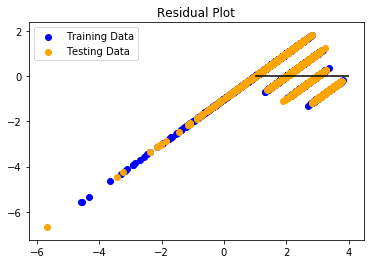

In [15]:
plt.scatter(linear_regression_model_1.predict(X_train), linear_regression_model_1.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(linear_regression_model_1.predict(X_test), linear_regression_model_1.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [16]:
linear_regression_model_1.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [17]:
print('intercept:', linear_regression_model_1.intercept_)
print('slope:', linear_regression_model_1.coef_)

intercept: [3.35571507]
slope: [[-1.03573633e-04  5.25700824e-08  1.88853496e-04  2.76827924e-04
   4.51472010e-04  1.92709329e-02 -1.18416328e-01  7.45792275e-05
  -1.18789824e-02 -2.47558354e-02  1.82440576e-02 -3.47490443e-02
   5.31398045e-02  3.19647601e-04 -3.19647601e-04  2.49938316e-01
  -3.44829158e-03 -2.46490024e-01  5.67058241e-03 -3.29227460e-02
   5.80413233e-02 -1.61430622e-02 -1.46460975e-02  1.99696662e-02
  -1.79824016e-02  6.68704684e-02 -1.00246509e-01  3.13887757e-02
   3.30628370e-03 -3.30628370e-03  4.68861445e-03 -9.77464289e-03
   5.08602844e-03  1.06484229e-02 -1.32840269e-02  2.63560403e-03
   6.88964108e-03  1.81531511e-02 -2.50427922e-02 -5.81541009e-02
   5.83998511e-02  6.64389090e-03  9.01622815e-03 -1.01186756e-02
   1.92555986e-02 -3.27950883e-02  1.76208928e-03  5.99020680e-03
  -6.67272699e-02  4.85123152e-02 -1.86213778e-02  3.68363324e-02
  -5.76096023e-03 -3.11323914e-04 -1.74975245e-02  2.35698086e-02
   2.88626471e-01 -1.86362014e-01 -9.65945881

In [23]:
# Now we will create a Linear Regression model with only numerical data to compare the models performance
only_numerical_df = new_data_quartileLTV.drop(columns = ['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'])
only_numerical_df.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Quartile LTV
0,56274,69,32,5,0,1,384.811147,4.0
1,0,94,13,42,0,8,1131.464935,2.0
2,48767,108,18,38,0,2,566.472247,1.0
3,0,106,18,65,0,7,529.881344,2.0
4,43836,73,12,44,0,1,138.130879,4.0


In [26]:
X_num = only_numerical_df.drop("Quartile LTV", axis=1)
y_num = only_numerical_df["Quartile LTV"].values.reshape(-1, 1)
print(X_num.shape, y_num.shape)

(9134, 7) (9134, 1)


In [27]:
# Split data to train and test model
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, random_state=24)

# Create second model
linear_regression_model_2 = LinearRegression()

In [28]:
linear_regression_model_2.fit(X_num_train, y_num_train)
training_score_2 = linear_regression_model_2 .score(X_num_train, y_num_train)
testing_score_2 = linear_regression_model_2 .score(X_num_test, y_num_test)


print(f"Training Score: {training_score_2}")
print(f"Testing Score: {testing_score_2}")

Training Score: 0.25739038627832156
Testing Score: 0.26465600382267085


In [ ]:
# The score is no better than the first model, but it is simpler (less variables)